# Часть I - ML

In [1]:
import os

import catboost
import pandas as pd
import shap

from sklearn.metrics import fbeta_score, make_scorer

In [3]:
TRAIN_DATA_PATH = os.path.join("..", "data", "processed", "train_data.parquet")

RANDOM_STATE = 42

In [4]:
train_data = pd.read_parquet(TRAIN_DATA_PATH)

In [5]:
X_train = train_data.drop(columns="target").set_index("id")
y_train = train_data["target"]

## CatBoost

In [36]:
classifier = catboost.CatBoostClassifier(
    verbose=False,
    random_state=RANDOM_STATE,
)

In [37]:
grid_search_results = classifier.grid_search(
    param_grid={"max_depth": [1, 2, 3, 4, 5]},
    X=X_train,
    y=y_train,
    cv=5,
    stratified=True,
    plot=True,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.6629205097
bestIteration = 999

0:	loss: 0.6629205	best: 0.6629205 (0)	total: 2.35s	remaining: 9.42s

bestTest = 0.5726645007
bestIteration = 999

1:	loss: 0.5726645	best: 0.5726645 (1)	total: 5.33s	remaining: 8s

bestTest = 0.5364175068
bestIteration = 999

2:	loss: 0.5364175	best: 0.5364175 (2)	total: 8.86s	remaining: 5.91s

bestTest = 0.5188854166
bestIteration = 999

3:	loss: 0.5188854	best: 0.5188854 (3)	total: 13s	remaining: 3.24s

bestTest = 0.5089076888
bestIteration = 996

4:	loss: 0.5089077	best: 0.5089077 (4)	total: 18.4s	remaining: 0us
Estimating final quality...
Training on fold [0/5]

bestTest = 0.504904031
bestIteration = 999

Training on fold [1/5]

bestTest = 0.5094568267
bestIteration = 999

Training on fold [2/5]

bestTest = 0.5087797204
bestIteration = 997

Training on fold [3/5]

bestTest = 0.5212770535
bestIteration = 999

Training on fold [4/5]

bestTest = 0.5009849598
bestIteration = 999



In [39]:
type(grid_search_results)

dict

## ShapValues

In [8]:
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(X_train)

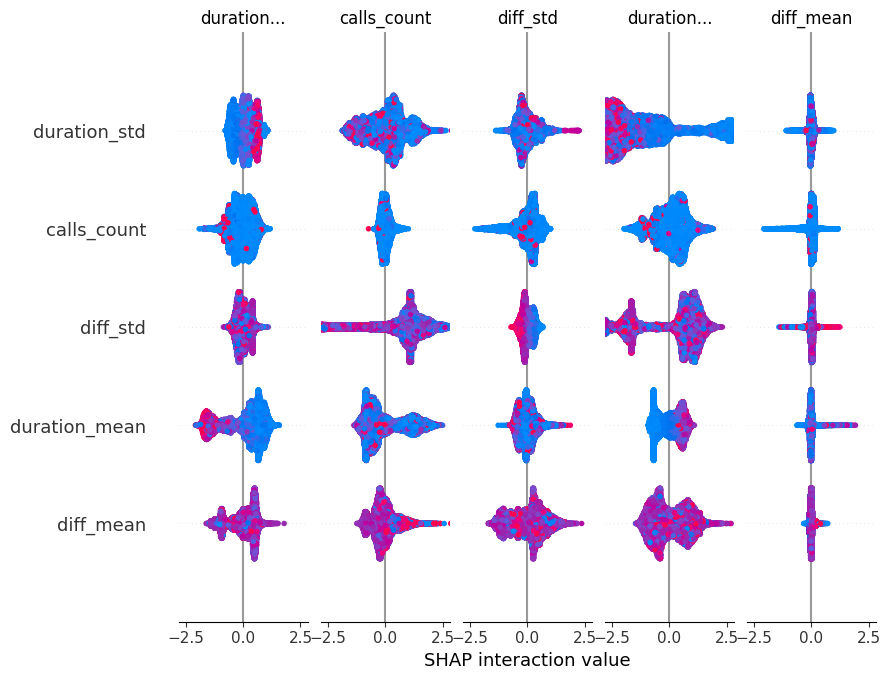

In [9]:
shap.summary_plot(
    shap_values=shap_values,
    features=X_train,
    class_names=classifier.classes_,
    # max_display=33,
)